# THIS IS A MULTILABEL CLASSIFICATION PROBLEM 

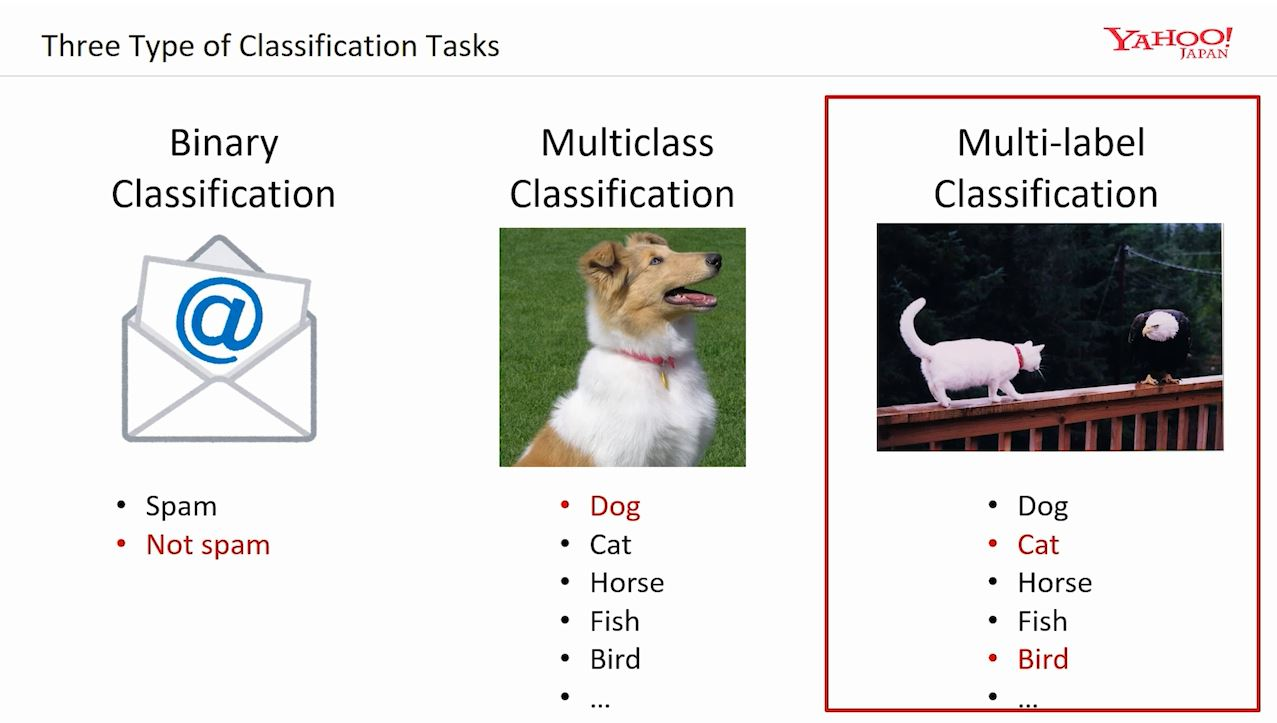

In [76]:
import bs4
from bs4 import BeautifulSoup
import requests 
import time 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# webscrapping the stack overflow website 

In [60]:
def scrape_question_data(url, page=1, page_size=50):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'}
    try:
        # Add page and page_size parameters to the URL
        url_with_page = f"{url}&page={page}&pagesize={page_size}"
        response = requests.get(url_with_page, headers=headers)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        
        question_summaries = soup.find_all('div', class_='s-post-summary')  
        questions_data = []

        for summary in question_summaries:
            title_element = summary.find('a', class_='s-link')        # <--- Check this
            title = title_element.text.strip() if title_element else "No title found"
            link = 'https://stackoverflow.com' + title_element['href'] if title_element else "No link found"

            body_element = summary.find("div", class_="s-post-summary--content-excerpt") # <--- Check this
            body = body_element.text.strip() if body_element else "No description found"

            tag_elements = summary.find_all('a', class_='s-tag')      # <--- Check this
            tags = [tag.text.strip() for tag in tag_elements]

            questions_data.append({'title': title, 'link': link, 'description': body, 'tags': tags})

        return questions_data

    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL (Page {page}): {e}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred (Page {page}): {e}")
        return None

def scrape_all_pages(base_url, num_pages=30, page_size=50):
    all_questions_data = []
    for page in range(1, num_pages + 1):
        page_data = scrape_question_data(base_url, page, page_size)
        if page_data is None:
            print(f"Failed to retrieve data from page {page}. Skipping.")
            continue
        all_questions_data.extend(page_data)
        print(f"Successfully scraped data from page {page}")
        time.sleep(2)  # Be respectful and add a delay
    return all_questions_data

base_search_url = "https://stackoverflow.com/search?q="
tags = ["datascience", "ai", "programming"]  
num_pages_to_scrape = 30
page_size = 50

all_dataframes = []  # List to store DataFrames for each tag

for tag in tags:
    search_url = f"{base_search_url}{tag}"  # Construct URL for the tag
    print(f"Scraping data for tag: {tag}")
    tag_data = scrape_all_pages(search_url, num_pages_to_scrape, page_size)

    if tag_data:
        df = pd.DataFrame(tag_data)
        df['tag'] = tag  # Add a 'tag' column to identify the source
        all_dataframes.append(df)
        print(f"Successfully scraped data for tag: {tag}")
    else:
        print(f"No data scraped for tag: {tag}")

if all_dataframes:
    combined_df = pd.concat(all_dataframes, ignore_index=True)  # Concatenate all DataFrames
    print("\nCombined DataFrame:")
    print(combined_df)

    # saving to the csv
    combined_df.to_csv("stackoverflow_combined_tags.csv", index=False)
    print("\nData saved to stackoverflow_combined_tags.csv")
else:
    print("No data scraped for any tags.")


Scraping data for tag: datascience
Successfully scraped data from page 1
Successfully scraped data from page 2
Successfully scraped data from page 3
Successfully scraped data from page 4
Successfully scraped data from page 5
Successfully scraped data from page 6
Successfully scraped data from page 7
Successfully scraped data from page 8
Successfully scraped data from page 9
Successfully scraped data from page 10
Successfully scraped data from page 11
Successfully scraped data from page 12
Successfully scraped data from page 13
Successfully scraped data from page 14
Successfully scraped data from page 15
Successfully scraped data from page 16
Successfully scraped data from page 17
Successfully scraped data from page 18
Successfully scraped data from page 19
Successfully scraped data from page 20
Successfully scraped data from page 21
Successfully scraped data from page 22
Successfully scraped data from page 23
Successfully scraped data from page 24
Successfully scraped data from page 25

# Loading the datset 

In [67]:
df = pd.read_csv(r"C:\Users\chand\Innomatics\Machine learning\Unique_Projects\stackoverflow_combined_tags.csv")

In [68]:
df.head()

,title,link,description,tags,tag
0,No title found,No link found,"Note, your code is really unclear here:\n\nfor...","['python', 'python-2.7', 'nlp', 'nltk']",datascience
1,Pushings files to Ec2 Instance using rsync,https://stackoverflow.com/questions/78736776/p...,Herre is the directory\n\nI'm using rsync and ...,"['amazon-web-services', 'amazon-ec2', 'rsync']",datascience
2,No title found,No link found,You could have easily found out answer to this...,"['python', 'pandas', 'correlation', 'p-value',...",datascience
3,No title found,No link found,For example:\nFROM bioconductor/devel_base\nCO...,"['docker', 'dockerfile']",datascience
4,"Stanford NER and POS, Multithreading for a lar...",https://stackoverflow.com/questions/41949846/s...,/pythonEnv/local/lib/python2.7/site-packages/n...,"['python', 'multithreading', 'nltk', 'stanford...",datascience


In [69]:
df["title"].value_counts()

title
No title found                                             1003
Is computer opponent in video games really AI? [closed]      21
JupyterHub Spawn Failed Didn't Respond in 30 Seconds         20
Game enemy computer AI logic                                 20
Problem with Google AI Platform Permissions                  20
                                                           ... 
Why is my pong AI jittering so much?                          1
AI : fire on moving object                                    1
Typo3 ai image - crop not working                             1
How to update Python on Vertex AI notebooks?                  1
Graphical DIFF programs for linux [closed]                    1
Name: count, Length: 1078, dtype: int64

In [70]:
df.shape

(4150, 5)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        4150 non-null   object
 1   link         4150 non-null   object
 2   description  4150 non-null   object
 3   tags         4150 non-null   object
 4   tag          4150 non-null   object
dtypes: object(5)
memory usage: 162.2+ KB


## EDA

In [96]:
tag_counts = df['tag'].value_counts()
print(tag_counts)

tag
ai             1495
programming    1141
datascience     511
Name: count, dtype: int64


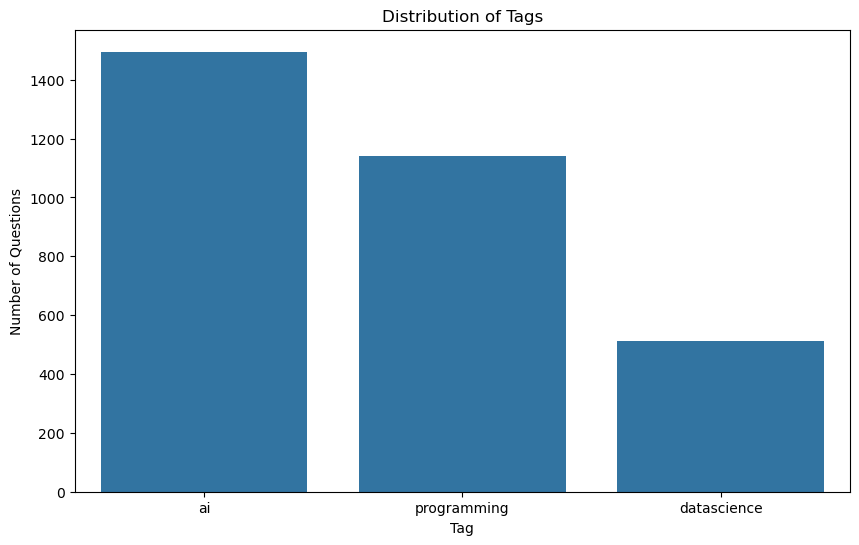

In [97]:
# Plotting Tag Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=tag_counts.index, y=tag_counts.values)
plt.title("Distribution of Tags")
plt.xlabel("Tag")
plt.ylabel("Number of Questions")
plt.show()